# **Análise exploratória de dados de acidentes de trabalho de uma das maiores empresas do Brasil e do mundo**

Analisar acidentes de trabalho é muito importante, pois assim podemos compreender melhor os acidentes e decidir a melhor forma de agir para que os acidentes diminuam ou até mesmo não aconteçam mais.

Então, com o intuito de entendermos melhor os acidentes de trabalho, este artigo tem por objetivo:
- Realizar uma análise exploratória dos acidentes de trabalho que ocorreram em uma das maiores empresas do Brasil no período de janeiro de 2016 a julho de 2017;
- Utilizar métodos não supervisionados de agrupamento para que, se possível, identificamos correlações ou agrupamentos (*clusters*) no conjunto de dados.

### **Carregando os dados necessários**

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import skfuzzy
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from IPython.display import display

%matplotlib inline

In [2]:
# Importando o arquivo *.csv com os dados dos acidentes de trabalho
acdt_fp = './IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv'
acdt_df = pd.read_csv(acdt_fp, index_col=0)

### **Análise do Conjunto de Dados**
A descrição dos atributos conforme a documentação fornecida para o conjunto de dados:

- `Data`: *timestamp* ou informação de data.
- `Countries`: em qual país ocorreu o acidente (anonimizado).
- `Local`: a cidade em que a planta industrial está localizada (anonimizado).
- `Industry Sector`: em qual setor a planta industrial pertence.
- `Accident Level`: de I a VI, registra o quão severo o acidente for (sendo I não severo, mas VI significa muito severo).
- `Potential Accident Level`: dependendo do `Accident Level`, registra o quão severo o acidente poderia ter sido (devido a outros fatores envolvidos no acidente).
- `Genre`: se a pessoa que sofreu o acidente é homem ou mulher.
- `Employee or Third Party`: se a pessoa que sofreu o acidente é empregada da empresa ou terceirizada.
- `Critical Risk`: descrição do risco envolvido no acidente. 
- `Description`: Descrição detalhada de como o acidente ocorreu.

Visualizando as 5 primeiras entradas do conjunto de dados e o tipo de cada atributo (coluna), para ter uma melhor noção de como o conjunto de dados é apresentado:

In [3]:
# Visualizando as 5 primeiras entradas:
print("As 5 primeiras entradas do conjunto de dados são:")
display(acdt_df.head())
print("\n")

print("O tipo de cada atributo é:")
display(acdt_df.dtypes)
print("\n")

As 5 primeiras entradas do conjunto de dados são:


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...




O tipo de cada atributo é:


Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

Também veremos a quantidade de entradas (linhas) e atributos (colunas) do conjunto de dados:

In [4]:
print("Entradas:", acdt_df.shape[0])
print("Atributos:", acdt_df.shape[1])

Entradas: 425
Atributos: 10


Com base no tipo de cada atributo, percebemos que todos são do tipo `object` (ou `string`). Como podemos perceber o atributo `Data`, aparece como `object`, então precisamos passá-lo para da (`datetime`):

Transformação do atributo `Data` em `datetime`:

In [5]:
acdt_df['Data'] = pd.to_datetime(acdt_df['Data'], format = '%Y-%m-%d %H:%M:%S')

Verificação do atributo `Data`:

In [6]:
# Visualizando as 5 primeiras entradas:
print("As 5 primeiras entradas do conjunto de dados são:")
display(acdt_df.head())
print('\n')

# Tipo de cada atributo
print("O tipo de cada atributo é:")
display(acdt_df.dtypes)
print("\n")

As 5 primeiras entradas do conjunto de dados são:


,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...




O tipo de cada atributo é:


Data                        datetime64[ns]
Countries                           object
Local                               object
Industry Sector                     object
Accident Level                      object
Potential Accident Level            object
Genre                               object
Employee or Third Party             object
Critical Risk                       object
Description                         object
dtype: object

Após o ajuste feito no atributo `Data`, iremos converte-lo em 3 novos atributos ano (`Year`), mês (`Month`) e dia (`Day`).
Fazendo a conversão:

In [7]:
acdt_df = acdt_df.assign(Year=acdt_df.Data.dt.year, Month=acdt_df.Data.dt.month, Day=acdt_df.Data.dt.day)

acdt_df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Year,Month,Day
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10


Agora, iremos verificar se há valores ausentes (*missing values*):

In [8]:
# Verificação de missing values:
print("A porcentagem de valores ausentes em cada atributo é:")
(acdt_df.isnull().sum() / acdt_df.shape[0]) * 100

A porcentagem de valores ausentes em cada atributo é:


Data                        0.0
Countries                   0.0
Local                       0.0
Industry Sector             0.0
Accident Level              0.0
Potential Accident Level    0.0
Genre                       0.0
Employee or Third Party     0.0
Critical Risk               0.0
Description                 0.0
Year                        0.0
Month                       0.0
Day                         0.0
dtype: float64

Como podemos perceber, não há valores ausentes no conjunto de dados.

Então, iremos verificar a frequência de cada entrada única em cada atributo (com exceção dos atributos `Data` e `Description`). Além disso, veremos se há alguma entrada estranha o conjunto de dados:

In [9]:
# Verificação da frequência de cada entrada única em cada atributo
print("Atributo 'Countries':")
display(acdt_df['Countries'].value_counts())
print('\n')

print("Atributo 'Local':")
display(acdt_df['Local'].value_counts())
print('\n')

print("Atributo 'Industry Sector':")
display(acdt_df['Industry Sector'].value_counts())
print('\n')

print("Atributo 'Accident Level':")
display(acdt_df['Accident Level'].value_counts())
print('\n')

print("Atributo 'Potential Accident Level':")
display(acdt_df['Potential Accident Level'].value_counts())
print('\n')

print("Atributo 'Genre':")
display(acdt_df['Genre'].value_counts())
print('\n')

print("Atributo 'Employee or Third Party':")
display(acdt_df['Employee or Third Party'].value_counts())
print('\n')

print("Atributo 'Critical Risk':")
display(acdt_df['Critical Risk'].value_counts())
print('\n')

print("Atributo 'Year':")
display(acdt_df['Year'].value_counts())
print('\n')

print("Atributo 'Month':")
display(acdt_df['Month'].value_counts())
print('\n')

print("Atributo 'Day':")
display(acdt_df['Day'].value_counts())
print('\n')

Atributo 'Countries':


Country_01    251
Country_02    130
Country_03     44
Name: Countries, dtype: int64



Atributo 'Local':


Local_03    90
Local_05    59
Local_01    57
Local_04    56
Local_06    46
Local_10    44
Local_08    27
Local_02    24
Local_07    14
Local_12     4
Local_09     2
Local_11     2
Name: Local, dtype: int64



Atributo 'Industry Sector':


Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64



Atributo 'Accident Level':


I      316
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64



Atributo 'Potential Accident Level':


IV     143
III    106
II      95
I       49
V       31
VI       1
Name: Potential Accident Level, dtype: int64



Atributo 'Genre':


Male      403
Female     22
Name: Genre, dtype: int64



Atributo 'Employee or Third Party':


Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee or Third Party, dtype: int64



Atributo 'Critical Risk':


Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Suspended Loads                                6
Fall prevention                                6
Power lock                                     3
Pressurized Systems / Chemical Substances      3
Blocking and isolation of energies             3
Liquid Metal                                   3
Electrical Shock                               2
Machine Protection  



Atributo 'Year':


2016    285
2017    140
Name: Year, dtype: int64



Atributo 'Month':


2     61
3     53
4     52
6     51
5     41
1     40
12    24
9     24
7     24
10    21
8     21
11    13
Name: Month, dtype: int64



Atributo 'Day':


8     25
4     22
16    19
11    18
22    17
23    17
24    16
1     16
25    15
2     15
18    15
17    15
15    15
13    15
5     14
30    14
6     13
10    13
9     12
29    12
14    12
7     11
12    11
19    11
20    11
3     10
21    10
27     9
26     9
31     7
28     6
Name: Day, dtype: int64

Analisando as entradas de cada atributo, percebe-se que há um entrada estranha no atributo `Critical Risk` que é a entrada `\nNot applicable`. E como o atributo `Critical Risk` é categórico, para o tratamento dessa entrada, iremos substituí-la pela entrada mais comum do atributo que é `Others`.

In [10]:
acdt_df['Critical Risk'] = acdt_df['Critical Risk'].replace(to_replace='\nNot applicable', value='Others')

In [11]:
print(acdt_df['Critical Risk'].value_counts())
print('\n')

Others                                       233
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Suspended Loads                                6
Fall prevention                                6
Power lock                                     3
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Liquid Metal                                   3
Electrical Shock                               2
Machine Protection  

Outra substituição que iremos fazer é no atributo `Employee or Third Party`, na entrada `Third Party (Remote)` e será substituída pela entrada `Third Party`.

Substituindo a entrada `Third Party (Remote)` pela entrada `Third Party`:

In [12]:
acdt_df['Employee or Third Party'] = acdt_df['Employee or Third Party'].replace(to_replace='Third Party (Remote)', value='Third Party')

In [13]:
print(acdt_df['Employee or Third Party'].value_counts())
print('\n')

Third Party    246
Employee       179
Name: Employee or Third Party, dtype: int64




#### **Representações gráficas dos atributos**

Após esse tratamento inicial feito no conjunto de dados, iremos fazer o histograma dos seguintes atributos:
- `Countries`;
- `Local`;
- `Industry Sector`;
- `Accident Level`;
- `Genre`;
- `Employee or Third Party`;
- `Critical Risk`;
- `Year`;
- `Month`;
- `Day`.

Os atributos `Data` e `Description` não serão utilizados, pois os mesmo apresentam, quase que em sua totalidade, entradas únicas, então não conseguiremos tirar informações relevantes desses atributos utilizando um histograma.
O atributo `Potential Accident Level` indica o quão severo o acidente poderia ter sido, no entanto para essa análise, nos interessa o que de fato aconteceu.

**Histograma do atributo `Countries`:**

(0, 260)

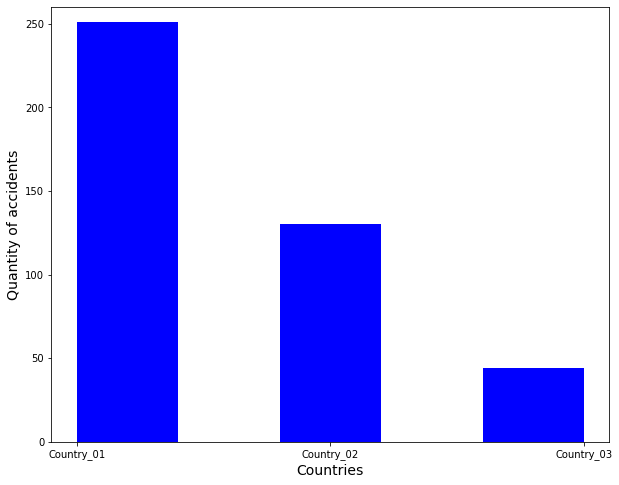

In [14]:
acdt_df['Countries'].hist(bins=5, figsize=(10,8), grid=False, facecolor='b')

plt.xlabel('Countries', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)
plt.ylim(0, 260)

Analisando o histograma do atributo `Countries`, podemos inferir:
- *Country_01* foi o país em que mais ocorreu acidentes, portanto é interessante começar por esse país medidas mais intensas para diminuir essa quantidade de acidentes de trabalho. No entanto, vale lembrar que os outros países também não podem ser negligenciados.

Como não sabemos quais são, exatamente, os 3 países, não tem como fazer análises de proporcionalidade, levando em conta população ou número de trabalhadores da empresa no país, por exemplo.

**Histograma do atributo `Local`:**

(0, 100)

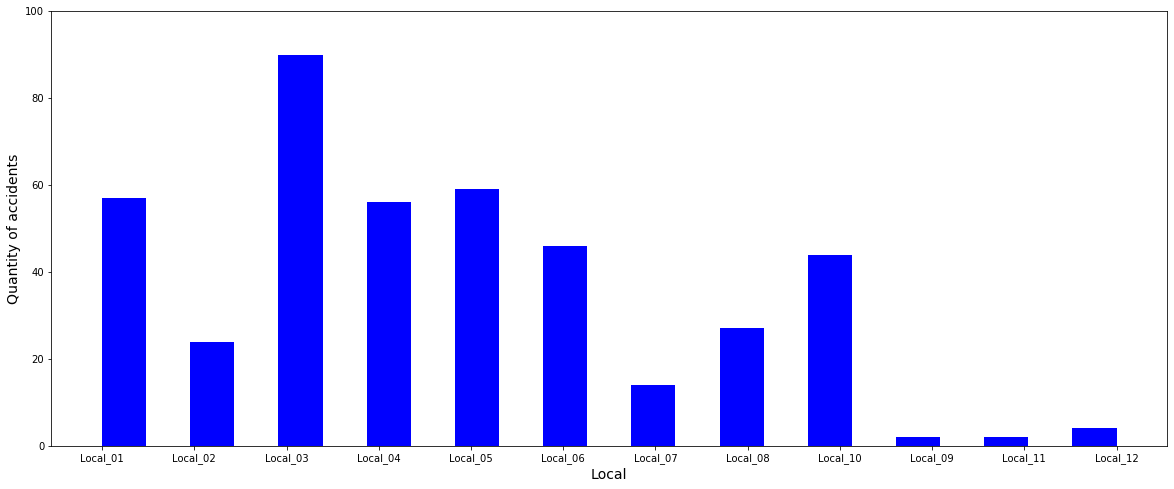

In [15]:
acdt_df['Local'].hist(bins=23, figsize=(20,8), grid=False, facecolor='b')

plt.xlabel('Local', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)
plt.ylim(0, 100)

Analisando o histograma do atributo `Local`, podemos inferir:
- *Local_03* é a cidade que apresenta o maior número de acidentes, portanto é interessante começar por essa cidade medidas mais intensas para diminuir essa quantidade de acidentes de trabalho. No entanto, vale lembrar que as outras cidade também não podem ser negligenciados.
- *Local_09*, *Local_11* e *Local_12* são as cidades em que a empresa registrou os menores números de acidentes de trabalho, portanto é interessante fazer uma análise nessas plantas para entender o motivo disso e, se possível, aplicar nas outras plantas.

Como não sabemos quais são, exatamente, as cidades, não tem como fazer análises de proporcionalidade, levando em conta o número de trabalhadores por cidade, por exemplo.

**Histograma do atributo `Industry Sector`:**

(0, 250)

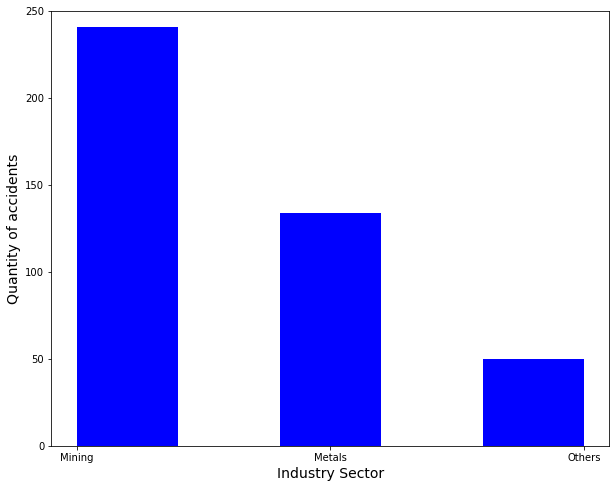

In [16]:
acdt_df['Industry Sector'].hist(bins=5, figsize=(10,8), grid=False, facecolor='b')

plt.xlabel('Industry Sector', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)
plt.ylim(0, 250)

Analisando o histograma do atributo `Industry Sector`, podemos inferir:
- `Mining` (Mineração) é o setor industrial que mais apresenta acidentes de trabalho, então é interessante que tenha mais ênfase. No entanto, sem negligenciar os outros setores.
- No setor `Mining` também é interessante que faça uma investigação mais aprofundada do motivo desse setor ter mais acidentes e, assim, agir de forma mais assertiva.

**Histograma do atributo `Accident Level`:**

(0, 330)

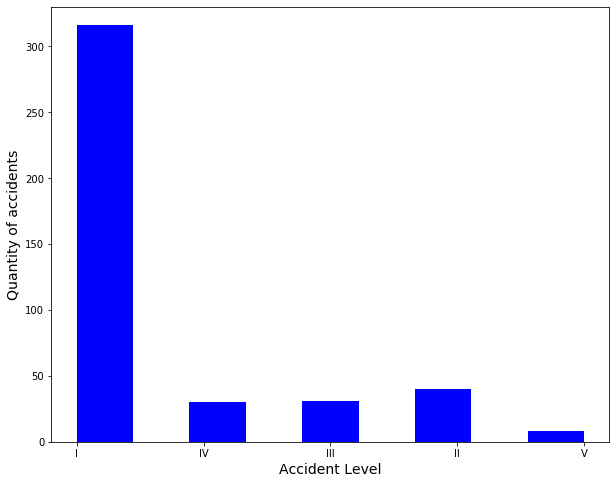

In [17]:
acdt_df['Accident Level'].hist(bins=9, figsize=(10,8), grid=False, facecolor='b')

plt.xlabel('Accident Level', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)
plt.ylim(0, 330)

Analisando o histograma do atributo `Accident Level`, podemos inferir:
- O nível do acidente (`Accident Level`) mais registrado é o nível `I`, ou seja, ocorre mais acidentes que não são severos, no entanto, é importante agir para que esse número de acidentes diminua drasticamente, pois um acidente de nível `I` pode, facilmente, se transformar em um acidente de nível `II` ou superior, trazendo consequências mais graves tanto para o trabalhador como para a empresa.

**Histograma do atributo `Genre`:**

(0, 420)

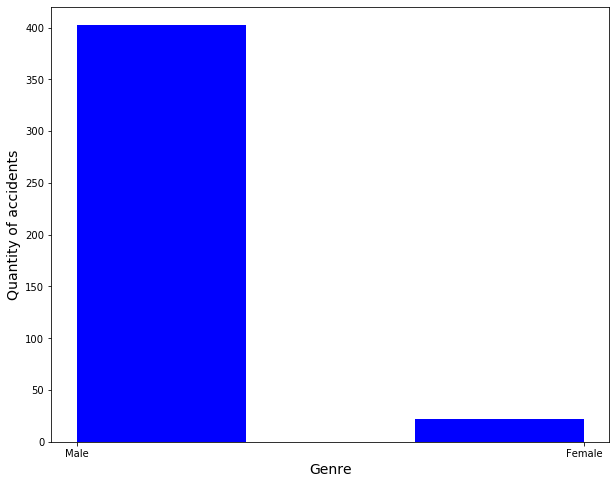

In [18]:
acdt_df['Genre'].hist(bins=3, figsize=(10,8), grid=False, facecolor='b')

plt.xlabel('Genre', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)
plt.ylim(0, 420)

Analisando o histograma do atributo `Genre`, podemos inferir:
- Percebe que a maioria dos acidentes ocorre com pessoas do gênero masculino (`Male`), isso pode acontecer por diversos fatores como, por exemplo:
 - Se a empresa emprega mais homens do que mulheres;
 - Homens tendem a sofrer mais que o dobro de acidentes de trabalho do que mulheres (Mais informações: [Clique Aqui](https://noticias.r7.com/economia/acidentes-de-trabalho-vitimam-duas-vezes-mais-os-homens-que-as-mulheres-diz-ibge-30062016));
 - Ocorrem mais com homens devido à problemas psicológicos, familiares/financeiros, com drogas ou álcool.

No entanto, vale ressaltar que essas são apenas suposições, seria necessário uma análise mais detalhada dentro da empresa para compreender melhor essa discrepância.

**Histograma do atributo `Employee or Third Party`:**

(0, 255)

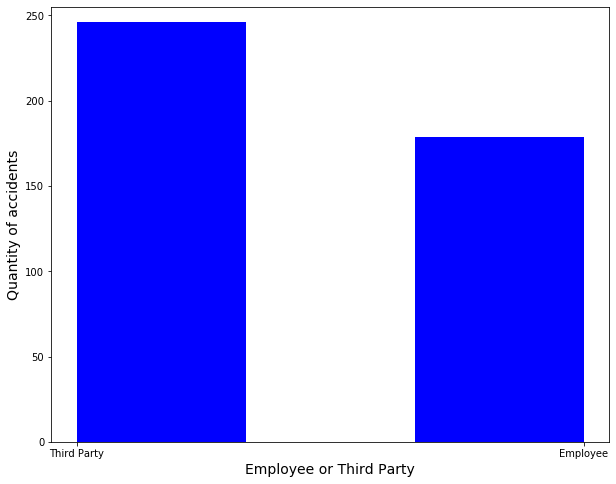

In [19]:
acdt_df['Employee or Third Party'].hist(bins=3, figsize=(10,8), grid=False, facecolor='b')

plt.xlabel('Employee or Third Party', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)
plt.ylim(0, 255)

Analisando o histograma do atributo `Genre`, podemos inferir:
- Os trabalhadores terceirizados (`Third Party`) apresentam um número levemente maior de acidentes do que os empregados diretos (`Employee`), no entanto não há como inferir algo sobre isso, pois não há um motivo claro de que um tipo de trabalhador possa sofrer mais acidentes do que o outro. (Para mais informações: [Clique Aqui](https://politica.estadao.com.br/blogs/fausto-macedo/terceirizacao-gera-mais-acidentes/))

**Histograma do atributo `Critical Risk`:**

Para o histograma do atributo `Critical Risk`, iremos utilizar apenas as entradas que tiveram 5 ou mais repetições, pois assim teremos uma melhor visualização do histograma.

In [21]:
# Ajustando o conjunto de dados
crisk_counts = acdt_df['Critical Risk'].value_counts()
crisk_df = crisk_counts[(crisk_counts.iloc[:] >= 5)]

Text(0, 0.5, 'Quantity of accidents')

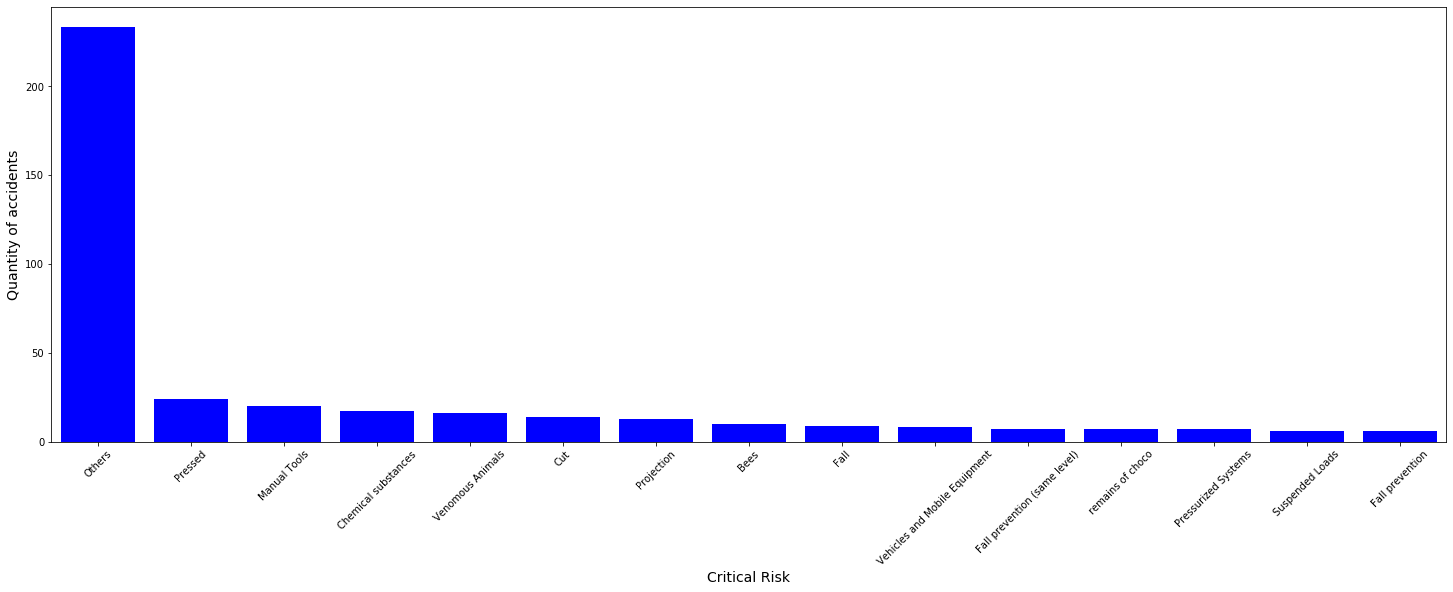

In [22]:
# Fazendo o histograma
plt.figure(figsize=(25,8))

sns.barplot(x=crisk_df.index, y=crisk_df[:], facecolor='b')

plt.xticks(rotation=45)
plt.xlabel('Critical Risk', fontsize=14)
plt.ylabel('Quantity of accidents', fontsize=14)

Analisando o histograma do atributo `Critical Risk`, podemos inferir:
- A entrada "Outros" (`Others`) é a que teve a maior quantidade de acidentes. No entanto, para uma melhor análise, seria interessante que no momento da coleta dessa o acidente ou fosse categorizado em uma das categorias já utilizados ou fosse criado novas categorias que ajudassem a entender melhor o Risco Crítico (`Critical Risk`).
- As duas próximas entrada "Prensado" (`Pressed`) e "Ferramentas Manuais" (`Manual Tools`), podem indicar que boa parte dos acidentes da empresa acontecem em serviços manuais, com isso vale iniciar por esses tipos de acidentes medidas mais intensas para diminuição de acidentes do trabalho. No entanto, sem negligenciar os outros tipos de acidentes.

**Representação gráfica comparando os acidentes de Janeiro a Julho em 2016 e 2017**

Como para o ano de 2017, há registros apenas até o mês de Julho, iremos comparar apenas a quantidade de acidentes de Janeiro a Julho tanto para 2016 como para 2017. E analisar se houve diminuição ou aumento de número de acidentes de um ano para o outro.

In [23]:
acdt_df_2016 = acdt_df[(acdt_df['Year'] == 2016) & (acdt_df['Month'] <= 7)]
acdt_df_2017 = acdt_df[(acdt_df['Year'] == 2017) & (acdt_df['Month'] <= 7)]

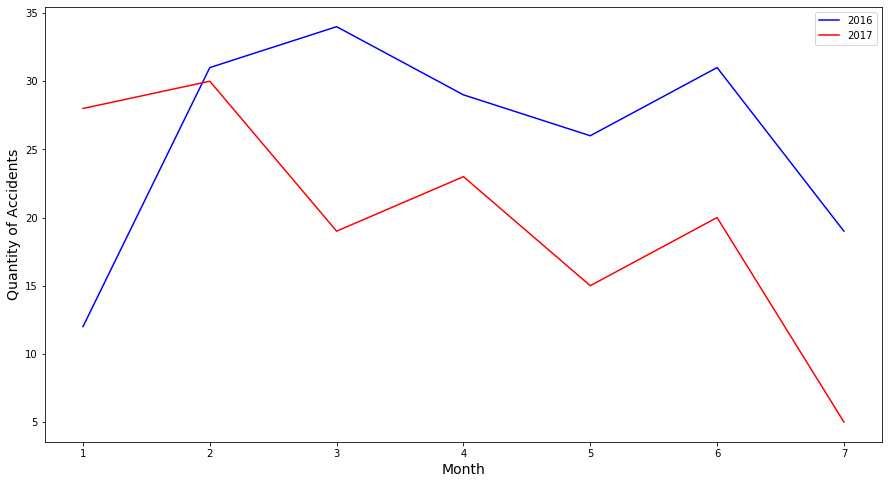

In [24]:
plt.figure(figsize=(15,8))

sns.lineplot(x=acdt_df_2016['Month'].value_counts().index, y=acdt_df_2016['Month'].value_counts(), label='2016', color="blue")
sns.lineplot(x=acdt_df_2017['Month'].value_counts().index, y=acdt_df_2017['Month'].value_counts(), label='2017', color="red")

plt.xlabel("Month", fontsize=14)
plt.ylabel("Quantity of Accidents", fontsize=14)

plt.show()

Analisando o gráfico de linhas de quantidades de acidentes por mês, podemos inferir:
- No mês de Janeiro em 2017 teve mais acidentes que em 2016, no entanto, em sua totalidade, 2017 teve menos acidentes acidentes do que 2016. E, isso é algo positivo para a empresa.
- Também percebe-se um certa sazonalidade entre o 2016 e 2017.

Agora faremos um histograma comparando a quantidade de acidentes até julho nos anos de 2016 e 2017:

In [25]:
acdt_df_year = acdt_df[(acdt_df['Month'] <= 7)]

Text(0, 0.5, 'Quantity of Accidents')

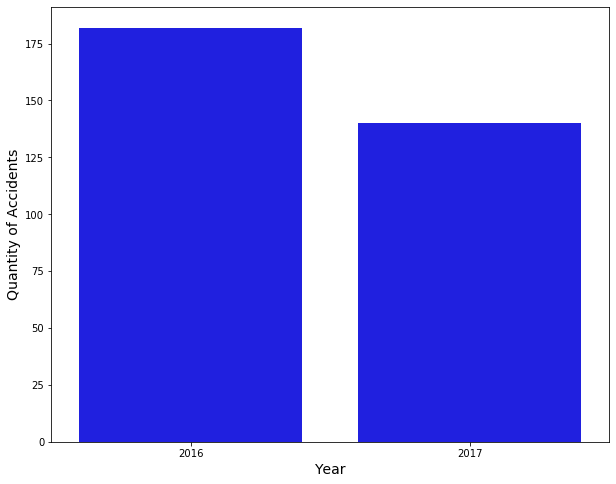

In [26]:
plt.figure(figsize=(10,8))

sns.barplot(x=acdt_df_year['Year'].value_counts().index, y=acdt_df_year['Year'].value_counts(), color="blue")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Quantity of Accidents", fontsize=14)

Analisando o histograma que compara a quantidade de acidentes por ano até o mês Julho, podemos inferir:
- Em 2017, realmente, houve um que na quantidade de acidentes em relação ao ao de 2016.

### **Tratamento do conjunto de dados**

Para o tratamento do conjunto dados, precisamos transformar os atributos categóricos em atributos numéricos. Pois não podemos ter qualquer dado no formato de texto quando construirmos o **modelo**.
Para essa transformação utilizaremos o seguinte método:
- *LabelEncoder*: esse método consiste em transformar as classes (entradas) categóricas em classes numéricas com os valores de 0 a 1 - n-classes, onde n é o número de rótulos (labels) distintos. Se um rótulo (label) se repete, ele atribui o mesmo número atribuído anteriormente. (Para mais informações e exemplos: [clique aqui](https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b)).

**Método** ***LabelEncoder***

Antes de utilizar o método *LabelEncoder*, precisamos retirar do conjunto de dados as colunas que não utilizaremos na construção do modelo, são elas: `Data`, `Potential Accident Level`, `Description`, `Year`, `Month`, `Day`.

In [28]:
# Removendo as colunas não utilizadas para o modelo
cols_remove = ['Data', 'Potential Accident Level', 'Description', 'Year', 'Month', 'Day']
df_le = acdt_df.drop(cols_remove, axis=1)

In [29]:
# Selecionando as colunas que serão mantidas
hr = (df_le.dtypes == 'object')
cols_select = list(hr[hr].index)
print("As colunas mantidas foram:")
print(cols_select)

As colunas mantidas foram:
['Countries', 'Local', 'Industry Sector', 'Accident Level', 'Genre', 'Employee or Third Party', 'Critical Risk']


In [30]:
# Aplicando o LabelEncoder
le = LabelEncoder()
for col in cols_select:
    df_le[col] = le.fit_transform(df_le[col])
    
print("Conjunto de dados após a utilização do LabelEncoder:")
display(df_le.head())

Conjunto de dados após a utilização do LabelEncoder:


,Countries,Local,Industry Sector,Accident Level,Genre,Employee or Third Party,Critical Risk
0,0,0,1,0,1,1,19
1,1,1,1,0,1,0,20
2,0,2,1,0,1,1,14
3,0,3,1,0,1,1,15
4,0,3,1,3,1,1,15


### **Aplicação de Métodos de Aprendizado Não-Supervisionado**

> Métodos de Aprendizado Não-Supervisionados servem para analisar se há padrões no conjunto de dados, tais como, tendências, anomalias, **agrupamentos**, etc. 
>
> Assim, é feito uma análise para tentar determinar se o conjunto de dados forma *agrupamentos ou clusters*. E após fazer esses agrupamentos, ainda precisa ser analisado o que significa cada agrupamento para o problema o conjunto de dados. Então, pode-se usar esses agrupamentos como atributo classe (meta ou *target*) para serem utilizados na aplicação de métodos de aprendizado supervisionado.
>
> Ainda, nos métodos de aprendizado não-supervisionado não há o atributo classe (meta ou *target*) no conjunto de dados.


Nesta seção, utilizaremos métodos não-supervisionados para analisar o conjunto de dados e tentar determinar se há alguma relação entre os dados. Para isso, utilizaremos os seguintes métodos:
- k-means;
- Fuzzy c-means;
- DBSCAN.

> Para todos os métodos utilizaremos o conjunto de dados transformado pelo método LabelEncoder.

> Ainda, como o conjunto de dados tem mais de 3 atributos, não há como visualizá-lo de forma direta. Para a visualização, precisamos utilizar a Análise de Componentes Principais (*Principal Component Analysis - PCA*) para reduzir o espaço para duas colunas e visualizar dessa forma.

#### **01 - Aplicação do Método de Aprendizado Não-Supervisionado: *k-means***

O primeiro método que iremos utilizar é o *k-means*. Para esse método precisamos definir a quantidade de agrupamentos (clusters) antes de aplicar o método, portanto iremos utilizar de 2 a 8 clusters e avaliar cada um deles.

##### **Método *k-means* com 2 clusters para o conjunto de dados**

In [31]:
data_km2 = df_le

# Construindo o modelo
cluster2 = KMeans(n_clusters=2, random_state=1)
cluster2.fit(data_km2)
data_km2['clusters'] = cluster2.labels_

In [32]:
print('O valor dos centróides de cada atributo é:')
print(cluster2.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster2.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[ 0.47222222  3.56388889  0.78333333  0.53055556  0.94722222  0.575
  13.21111111]
 [ 0.73846154  4.67692308  0.90769231  0.50769231  0.95384615  0.6
  26.29230769]]


Cluster de cada entrada:
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 0 

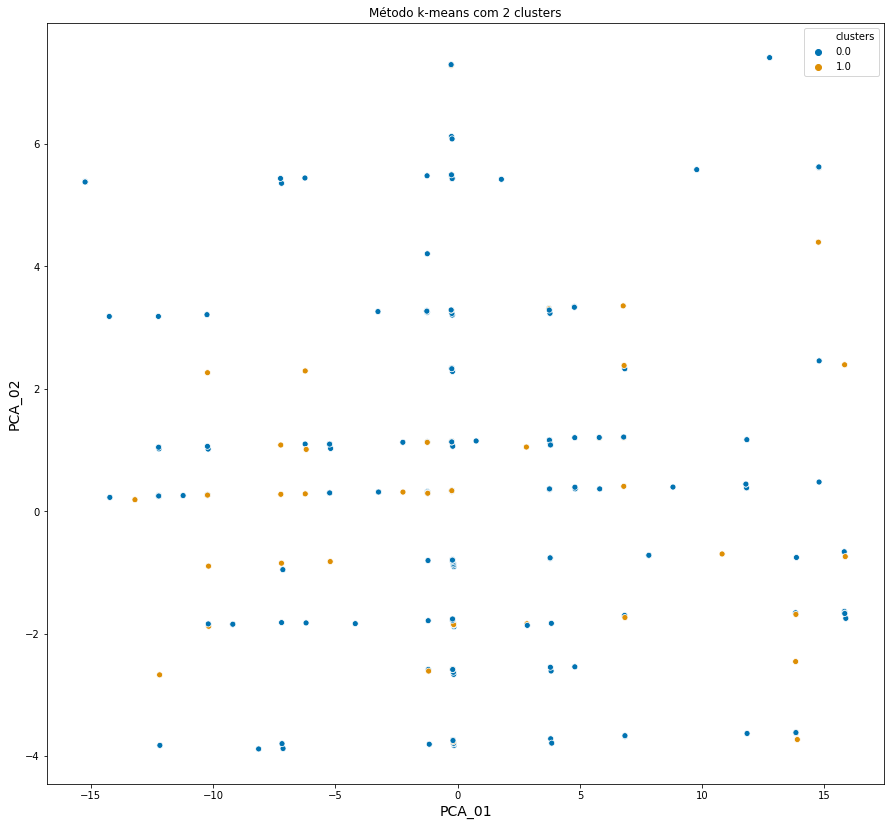

In [33]:
# Utilizando o PCA
red_data_km2 = PCA(n_components=2).fit_transform(data_km2)
resultados2 = pd.DataFrame(red_data_km2, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", palette=sns.color_palette("colorblind", n_colors=2), hue=data_km2['clusters'],  data=resultados2)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 2 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 2 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Método *k-means* com 3 clusters para o conjunto de dados**

In [34]:
data_km3 = df_le

# Construindo o modelo
cluster3 = KMeans(n_clusters=3, random_state=1)
cluster3.fit(data_km3)
data_km3['clusters'] = cluster3.labels_

In [35]:
print('O valor dos centróides de cada atributo é:')
print(cluster3.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster3.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[3.97993311e-01 3.31438127e+00 8.02675585e-01 5.55183946e-01
  9.59866221e-01 5.65217391e-01 1.53979933e+01 3.01003344e-02]
 [8.14285714e-01 4.81428571e+00 6.00000000e-01 3.85714286e-01
  8.85714286e-01 6.14285714e-01 4.78571429e+00 5.55111512e-17]
 [7.50000000e-01 4.62500000e+00 1.05357143e+00 5.53571429e-01
  9.64285714e-01 6.07142857e-01 2.72500000e+01 1.00000000e+00]]


Cluster de cada entrada:
[0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 1 2 0 0 0 0 0 0 1
 0 1 0 0 0 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 

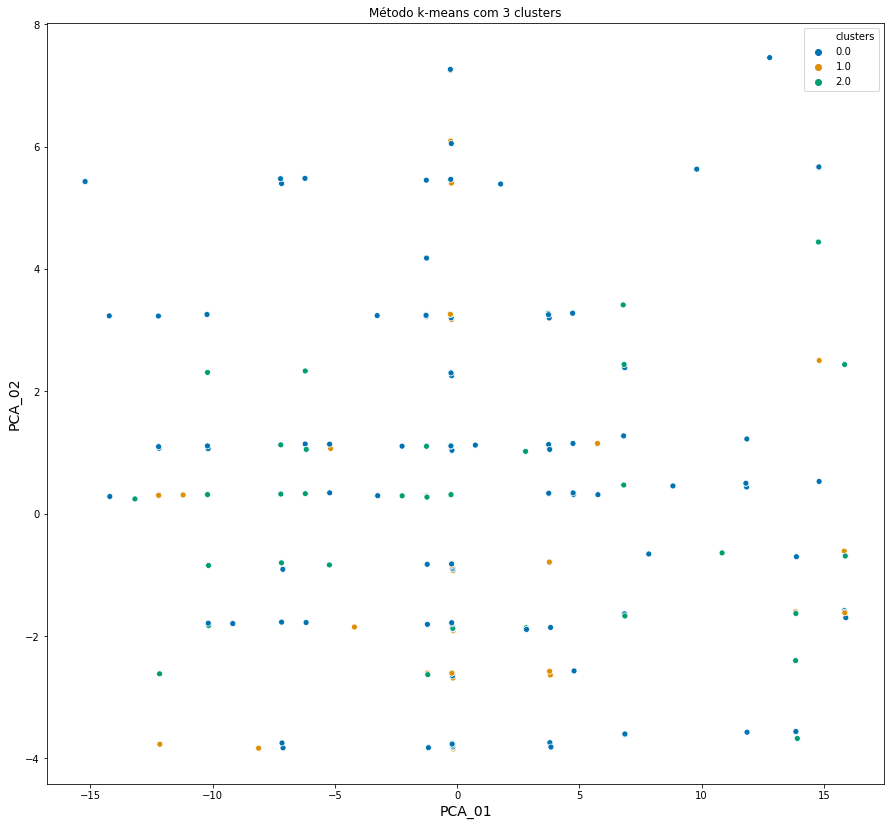

In [36]:
# Utilizando o PCA
red_data_km3 = PCA(n_components=2).fit_transform(data_km3)
resultados3 = pd.DataFrame(red_data_km3, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=data_km3['clusters'], palette=sns.color_palette("colorblind", n_colors=3), data=resultados3)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 3 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 3 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Método *k-means* com 4 clusters para o conjunto de dados**

In [37]:
data_km4 = df_le

# Construindo o modelo
cluster4 = KMeans(n_clusters=4, random_state=1)
cluster4.fit(data_km4)
data_km4['clusters'] = cluster4.labels_

In [38]:
print('O valor dos centróides de cada atributo é:')
print(cluster4.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster4.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[ 1.94174757e-01  1.85922330e+00  9.12621359e-01  5.82524272e-01
   9.85436893e-01  6.11650485e-01  1.50582524e+01  9.43689571e-16]
 [ 7.50000000e-01  4.62500000e+00  1.05357143e+00  5.53571429e-01
   9.64285714e-01  6.07142857e-01  2.72500000e+01  2.00000000e+00]
 [ 8.14285714e-01  4.81428571e+00  6.00000000e-01  3.85714286e-01
   8.85714286e-01  6.14285714e-01  4.78571429e+00  1.00000000e+00]
 [ 8.49462366e-01  6.53763441e+00  5.59139785e-01  4.94623656e-01
   9.03225806e-01  4.62365591e-01  1.61505376e+01 -6.66133815e-16]]


Cluster de cada entrada:
[0 0 0 0 0 3 2 0 0 2 0 0 0 2 2 0 0 3 3 3 3 0 0 0 3 3 0 0 0 3 0 0 0 0 0 3 0
 3 3 0 0 3 0 3 2 0 3 0 0 0 1 0 0 0 3 2 0 0 3 0 3 0 0 2 2 2 0 0 0 0 0 3 3 0
 0 0 0 0 3 3 3 0 3 2 3 0 0 0 0 3 0 0 0 0 2 0 0 0 0 3 2 2 0 3 0 0 0 2 3 0 0
 2 2 0 3 0 2 0 0 3 0 0 2 2 0 2 0 0 0 2 2 3 2 2 0 0 3 0 2 0 0 0 2 2 3 0 0 0
 2 2 2 2 2 2 3 0 0 0 3 0 0 0 0 3 0 0 0 0 3 3 0 1 0 2 0 2 2 1 3 0 0 3 0 0 2
 0 2 0 3 0 0 1 0 0 0 3

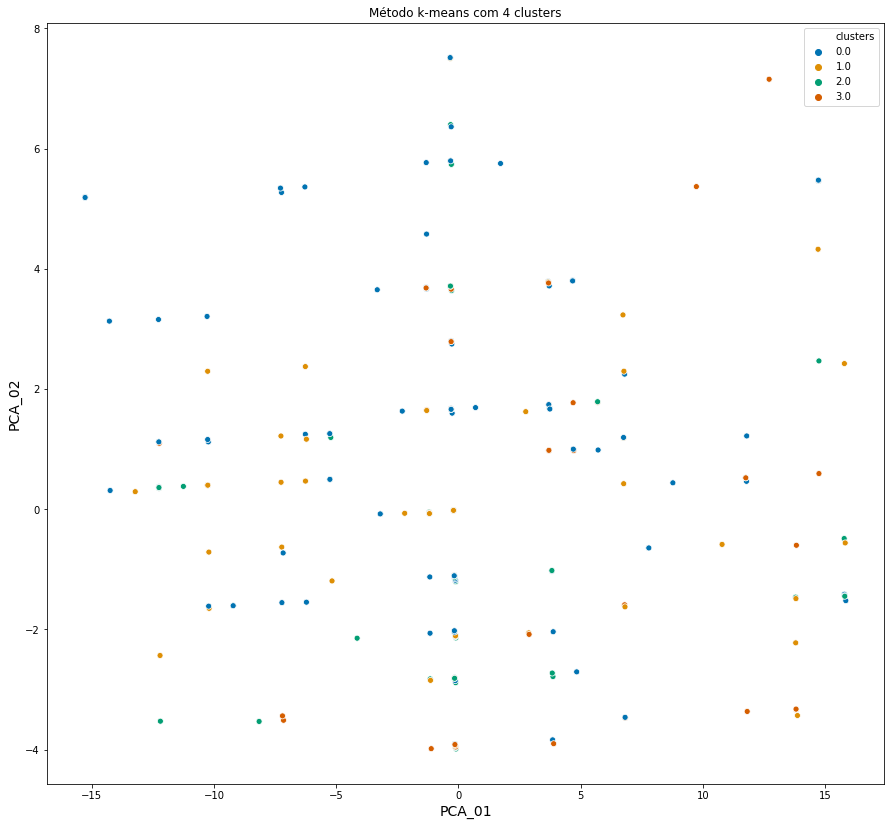

In [39]:
# Utilizando o PCA
red_data_km4 = PCA(n_components=2).fit_transform(data_km4)
resultados4 = pd.DataFrame(red_data_km4, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=data_km4['clusters'], palette=sns.color_palette("colorblind", n_colors=4), data=resultados4)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 4 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 4 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Método *k-means* com 5 clusters para o conjunto de dados**

In [40]:
data_km5 = df_le

# Construindo o modelo
cluster5 = KMeans(n_clusters=5, random_state=1)
cluster5.fit(data_km5)
data_km5['clusters'] = cluster5.labels_

In [41]:
print('O valor dos centróides de cada atributo é:')
print(cluster5.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster5.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[ 8.41269841e-01  4.76190476e+00  6.34920635e-01  3.80952381e-01
   8.73015873e-01  6.19047619e-01  4.22222222e+00  2.00000000e+00]
 [ 8.76712329e-01  6.87671233e+00  7.39726027e-01  4.65753425e-01
   8.90410959e-01  4.52054795e-01  1.43424658e+01  2.90410959e+00]
 [ 9.25000000e-01  5.20000000e+00  1.20000000e+00  6.25000000e-01
   9.50000000e-01  6.50000000e-01  2.92500000e+01  1.00000000e+00]
 [ 1.85000000e-01  1.86000000e+00  9.10000000e-01  5.75000000e-01
   9.85000000e-01  6.15000000e-01  1.49350000e+01 -4.66293670e-15]
 [ 5.51020408e-01  4.18367347e+00  3.46938776e-01  5.30612245e-01
   9.79591837e-01  5.10204082e-01  2.03061224e+01  1.97959184e+00]]


Cluster de cada entrada:
[3 4 3 3 3 4 1 4 3 0 3 3 3 0 0 3 3 1 1 1 1 3 3 3 1 1 3 3 3 1 3 3 3 3 3 4 3
 1 1 3 3 4 3 4 0 3 1 3 3 3 2 3 3 3 1 0 3 3 4 3 1 3 3 0 1 0 3 3 3 3 3 1 4 3
 3 3 3 3 1 1 1 3 1 1 4 3 3 3 3 4 3 3 3 3 0 3 3 3 3 4 0 0 3 4 3 3 3 0 1 3 3
 0 0 3 1 3 0 3 3 1 3 3 0 1 3 0 3 3 3 0 

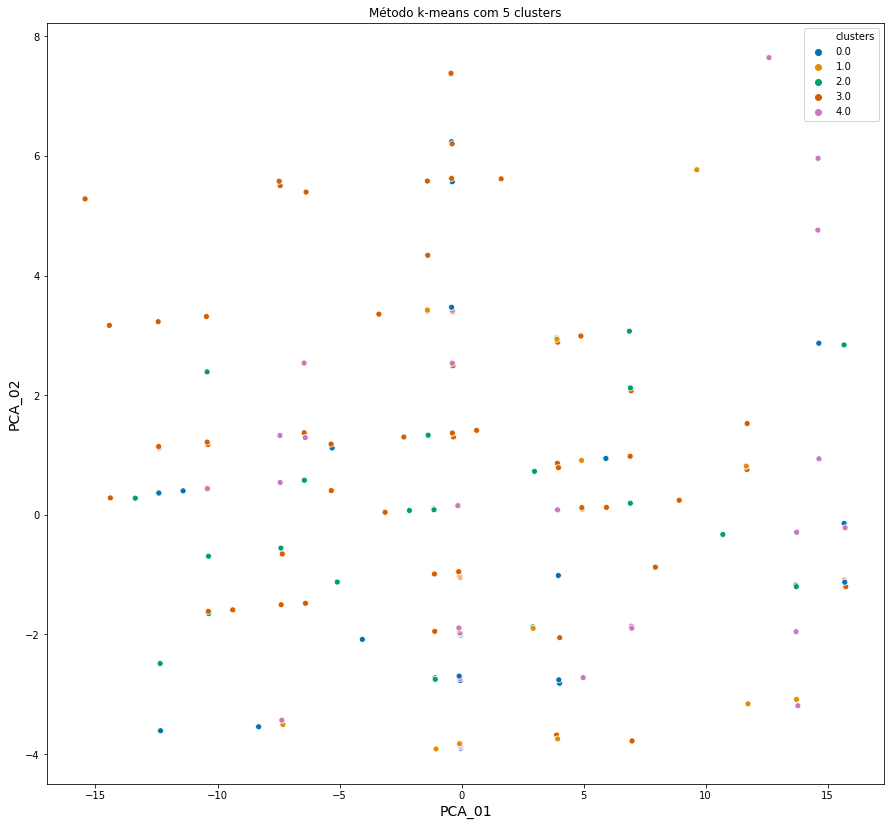

In [42]:
# Utilizando o PCA
red_data_km5 = PCA(n_components=2).fit_transform(data_km5)
resultados5 = pd.DataFrame(red_data_km5, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=data_km5['clusters'], palette=sns.color_palette("colorblind", n_colors=5), data=resultados5)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 5 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 5 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Método *k-means* com 6 clusters para o conjunto de dados**

In [43]:
data_km6 = df_le

# Construindo o modelo
cluster6 = KMeans(n_clusters=6, random_state=1)
cluster6.fit(data_km6)
data_km6['clusters'] = cluster6.labels_

In [44]:
print('O valor dos centróides de cada atributo é:')
print(cluster6.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster6.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[ 9.25000000e-01  5.20000000e+00  1.20000000e+00  6.25000000e-01
   9.50000000e-01  6.50000000e-01  2.92500000e+01  2.00000000e+00]
 [ 9.09090909e-01  7.04545455e+00  7.87878788e-01  4.69696970e-01
   8.78787879e-01  4.39393939e-01  1.48181818e+01  1.00000000e+00]
 [ 4.87179487e-01  3.76923077e+00  5.64102564e-01  5.89743590e-01
   8.71794872e-01  6.92307692e-01  7.20512821e+00  2.56410256e-01]
 [ 1.85929648e-01  1.85427136e+00  9.09547739e-01  5.77889447e-01
   9.89949749e-01  6.13065327e-01  1.49597990e+01  3.00000000e+00]
 [ 1.18750000e+00  6.03125000e+00  6.56250000e-01  1.25000000e-01
   8.75000000e-01  5.31250000e-01  2.00000000e+00 -8.88178420e-16]
 [ 5.51020408e-01  4.18367347e+00  3.46938776e-01  5.30612245e-01
   9.79591837e-01  5.10204082e-01  2.03061224e+01  4.00000000e+00]]


Cluster de cada entrada:
[3 5 3 3 3 5 2 5 3 4 3 3 3 2 4 3 3 1 1 1 1 3 3 3 1 1 3 3 3 1 3 3 3 3 3 5 3
 1 1 3 3 5 3 5 4 3 1 3 3 3 0 3 3 3 1 4 3 3 5 3 1 3 3 4 2

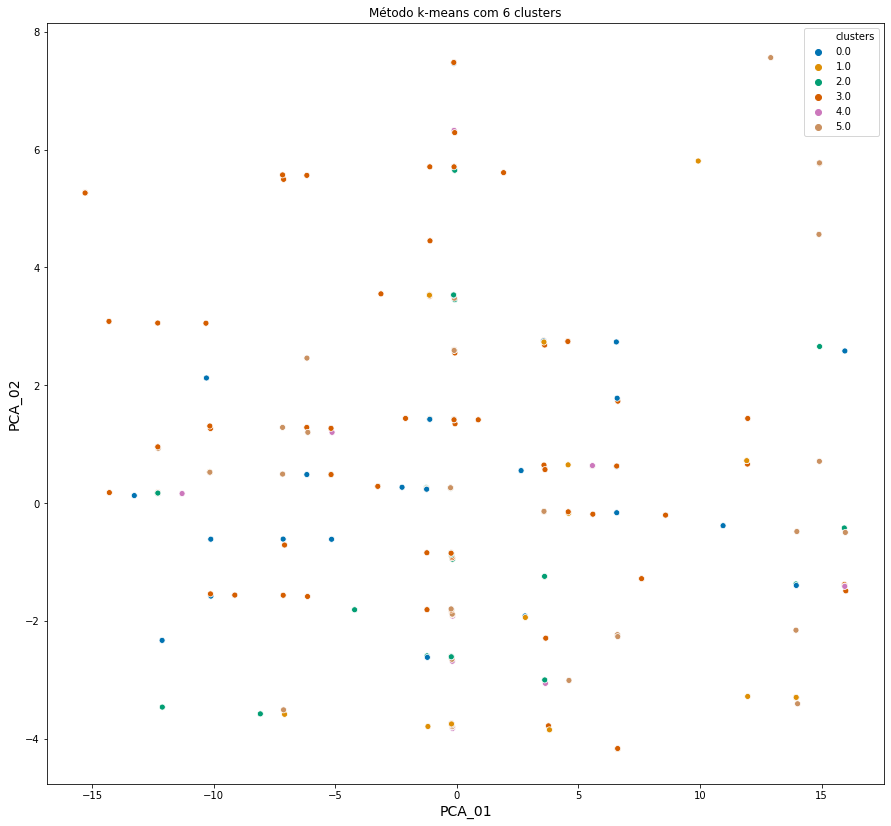

In [45]:
# Utilizando o PCA
red_data_km6 = PCA(n_components=2).fit_transform(data_km6)
resultados6 = pd.DataFrame(red_data_km6, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=data_km6['clusters'], palette=sns.color_palette("colorblind", n_colors=6), data=resultados6)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 6 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 6 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Método *k-means* com 7 clusters para o conjunto de dados**

In [46]:
data_km7 = df_le

# Construindo o modelo
cluster7 = KMeans(n_clusters=7, random_state=1)
cluster7.fit(data_km7)
data_km7['clusters'] = cluster7.labels_

In [47]:
print('O valor dos centróides de cada atributo é:')
print(cluster7.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster7.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[ 9.09090909e-01  7.04545455e+00  7.87878788e-01  4.69696970e-01
   8.78787879e-01  4.39393939e-01  1.48181818e+01  1.00000000e+00]
 [ 1.86868687e-01  1.85353535e+00  9.09090909e-01  5.75757576e-01
   9.89898990e-01  6.11111111e-01  1.49797980e+01  3.00000000e+00]
 [ 1.06976744e+00  5.39534884e+00  5.34883721e-01  1.39534884e-01
   8.60465116e-01  4.88372093e-01  2.67441860e+00  3.48837209e+00]
 [ 2.60869565e-01  2.47826087e+00  7.39130435e-01  1.08695652e+00
   9.56521739e-01  5.21739130e-01  2.90000000e+01 -1.77635684e-15]
 [ 3.79310345e-01  3.79310345e+00  7.24137931e-01  7.58620690e-01
   8.96551724e-01  8.27586207e-01  8.31034483e+00  2.03448276e+00]
 [ 5.51020408e-01  4.18367347e+00  3.46938776e-01  5.30612245e-01
   9.79591837e-01  5.10204082e-01  2.03061224e+01  5.00000000e+00]
 [ 1.82352941e+00  8.88235294e+00  1.82352941e+00 -1.11022302e-16
   9.41176471e-01  8.23529412e-01  2.95882353e+01 -8.88178420e-16]]


Cluster de cada entrada

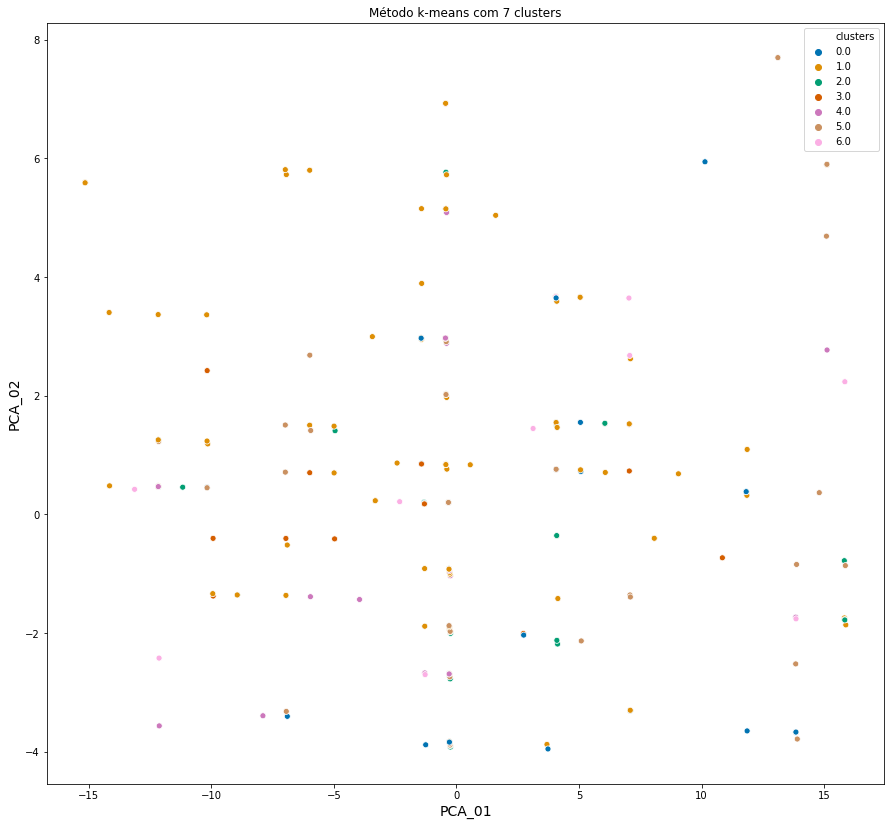

In [48]:
# Utilizando o PCA
red_data_km7 = PCA(n_components=2).fit_transform(data_km7)
resultados7 = pd.DataFrame(red_data_km7, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=data_km7['clusters'], palette=sns.color_palette("colorblind", n_colors=7), data=resultados7)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 7 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 7 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Método *k-means* com 8 clusters para o conjunto de dados**

In [49]:
data_km8 = df_le

# Construindo o modelo
cluster8 = KMeans(n_clusters=8, random_state=1)
cluster8.fit(data_km8)
data_km8['clusters'] = cluster8.labels_

In [50]:
print('O valor dos centróides de cada atributo é:')
print(cluster8.cluster_centers_)
print('\n')
print('Cluster de cada entrada:')
print(cluster8.labels_)
print('\n')

O valor dos centróides de cada atributo é:
[[ 1.86868687e-01  1.85353535e+00  9.09090909e-01  5.75757576e-01
   9.89898990e-01  6.11111111e-01  1.49797980e+01  1.00000000e+00]
 [ 2.60869565e-01  2.47826087e+00  7.39130435e-01  1.08695652e+00
   9.56521739e-01  5.21739130e-01  2.90000000e+01  3.00000000e+00]
 [ 7.14285714e-01  4.05714286e+00  1.71428571e-01  2.28571429e-01
   8.00000000e-01  4.28571429e-01  3.68571429e+00  2.17142857e+00]
 [ 5.51020408e-01  4.18367347e+00  3.46938776e-01  5.30612245e-01
   9.79591837e-01  5.10204082e-01  2.03061224e+01  5.00000000e+00]
 [ 4.23076923e-01  3.96153846e+00  6.92307692e-01  7.69230769e-01
   9.23076923e-01  8.07692308e-01  8.69230769e+00  4.00000000e+00]
 [ 9.09090909e-01  7.04545455e+00  7.87878788e-01  4.69696970e-01
   8.78787879e-01  4.39393939e-01  1.48181818e+01 -1.55431223e-15]
 [ 1.82352941e+00  8.88235294e+00  1.82352941e+00 -1.11022302e-16
   9.41176471e-01  8.23529412e-01  2.95882353e+01  6.00000000e+00]
 [ 1.90909091e+00  8.81818

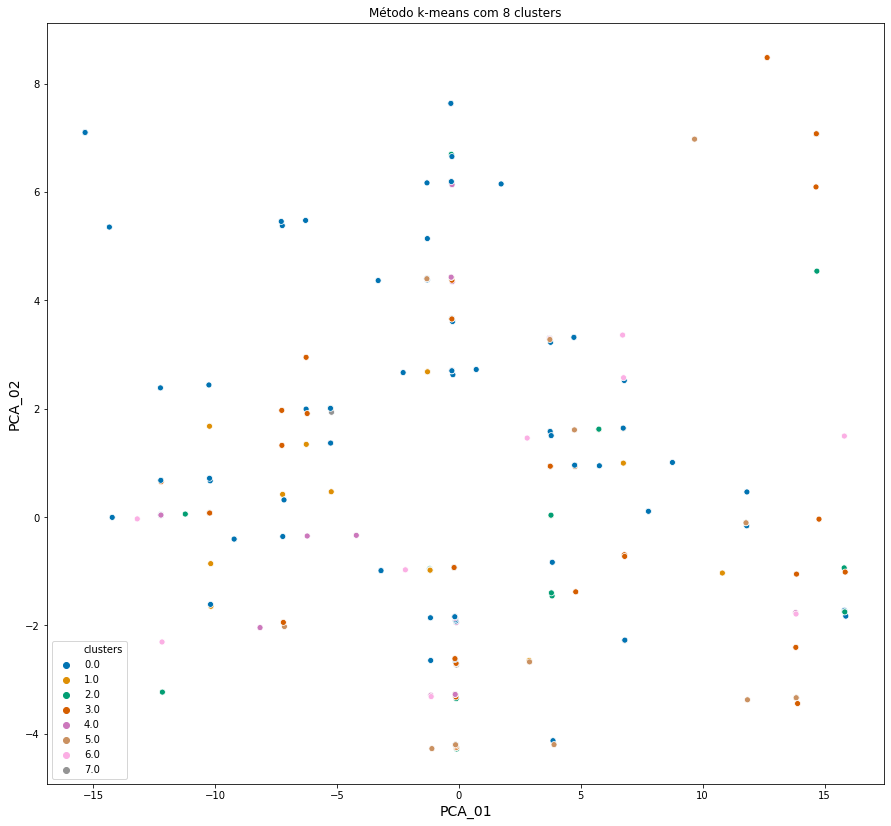

In [51]:
# Utilizando o PCA
red_data_km8 = PCA(n_components=2).fit_transform(data_km8)
resultados8 = pd.DataFrame(red_data_km8, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=data_km8['clusters'], palette=sns.color_palette("colorblind", n_colors=8), data=resultados8)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método k-means com 8 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando 8 clusters não temos uma correlação ou agrupamento claro entre os dados.

##### **Conclusões sobre o Método *k-means***

Utilizando o método *k-means*, percebemos que:
- Não foi possível identificar correlações ou agrupamentos claros;
- Se continuarmos aumentando a quantidade de *clusters*, podemos até identificar agrupamentos pra o conjunto de dados, no entanto é provável que ocorra *overfitting* (Mais informações: [clique aqui](https://pt.wikipedia.org/wiki/Sobreajuste)) o que é um problema para a construção de um modelo.
- O conjunto de dados pode não apresentar qualquer tipo de agrupamento.

**02 - Aplicação do Método de Aprendizado Não-Supervisionado: *Fuzzy c-means***

Para a utilização do método *Fuzzy c-means* precisamos definir o número de *clusters* que queremos, no entanto esse método não vai nos mostrar diretamente em qual *cluster* cada entrada pertence e sim a probabilidade de cada entrada pertencem à cada *cluster* (Mais informações [clique aqui](https://en.wikipedia.org/wiki/Fuzzy_clustering)). Primeiro, iremos selecionar 3 *clusters* e faremos uma análise.

In [52]:
df_fc = df_le

# Construção do modelo
res_fc = skfuzzy.cmeans(df_fc.values.T, c = 3, m = 2, error = 0.005, maxiter = 1000000, init = None)

In [53]:
# Criando uma variável com as probabilidades de cada entrada em cada grupo
prev_pct = res_fc[1]

In [54]:
# Selecionando a maior probabilidade para cada entrada
prev  = prev_pct.argmax(axis = 0)

In [55]:
# Acrescentando a coluna 'clusters' ao conjunto de dados
df_fc['clusters'] = prev

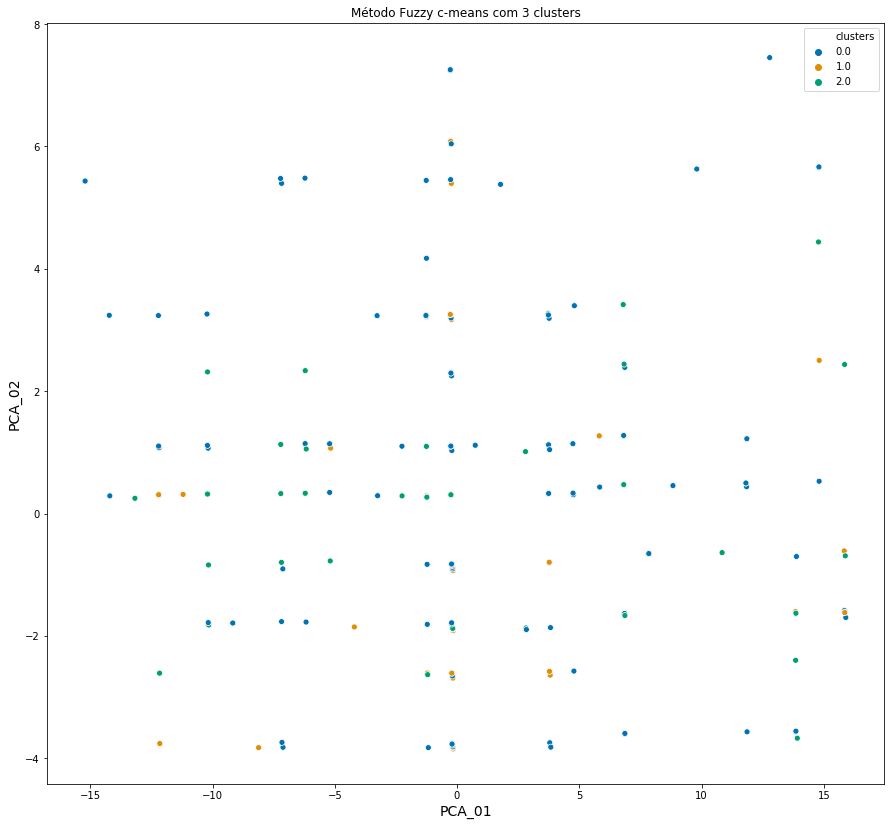

In [56]:
# Utilizando o PCA
red_df_fc = PCA(n_components=2).fit_transform(df_fc)
res_fc = pd.DataFrame(red_df_fc, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=df_fc['clusters'], palette=sns.color_palette("colorblind", n_colors=3), data=res_fc)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método Fuzzy c-means com 3 clusters')
plt.show()

Como pode perceber pelo gráfico, utilizando o método *Fuzzy c-means* com 3 clusters não temos uma correlação ou agrupamento claro entre os dados. No entanto, não iremos continuar tentando com outras quantidades de clusters como fizemos no método *k-means*.

##### **Conclusões sobre o Método *Fuzzy c-means***

Utilizando o método *Fuzzy c-means*, percebemos que:
- Não foi possível identificar correlações ou agrupamentos claros;
- O conjunto de dados pode não apresentar qualquer tipo de agrupamento, pois o método *Fuzzy c-means* e, também, o método *k-means* não conseguiram identificar agrupamentos.

**03 - Aplicação do Método de Aprendizado Não-Supervisionado: *DBSCAN***

O método *DBSCAN* é baseado em densidade, ou seja, dado um conjunto de pontos em um espaço, o método que agrupa pontos que tenham muitos vizinhos próximos (alta densidade), e marca como *outliers* pontos que estão em regiões de baixa densidade (poucos vizinhos) (Para mais informações [clique aqui](https://en.wikipedia.org/wiki/DBSCAN)). 

Então, para o método *DBSCAN* precisamos definir:
- eps (raio da vizinhança);
- MinPts (número mínimo de pontos em uma região densa);

Assim, aplicando o método:

In [57]:
df_dbs = df_le

# Construção do modelo
cluster_dbs = DBSCAN(eps=3, min_samples=5)
cluster_dbs.fit(df_dbs)
df_dbs['clusters'] = cluster_dbs.labels_

In [58]:
print('Foram gerados o seguintes agrupamentos: ')
print(df_dbs['clusters'].unique())
print('\n')
print('Cluster de cada entrada:')
print(cluster_dbs.labels_)
print('\n')

Foram gerados o seguintes agrupamentos: 
[ 0 -1  1  2]


Cluster de cada entrada:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0 -1  1
  0  0  0  0  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0

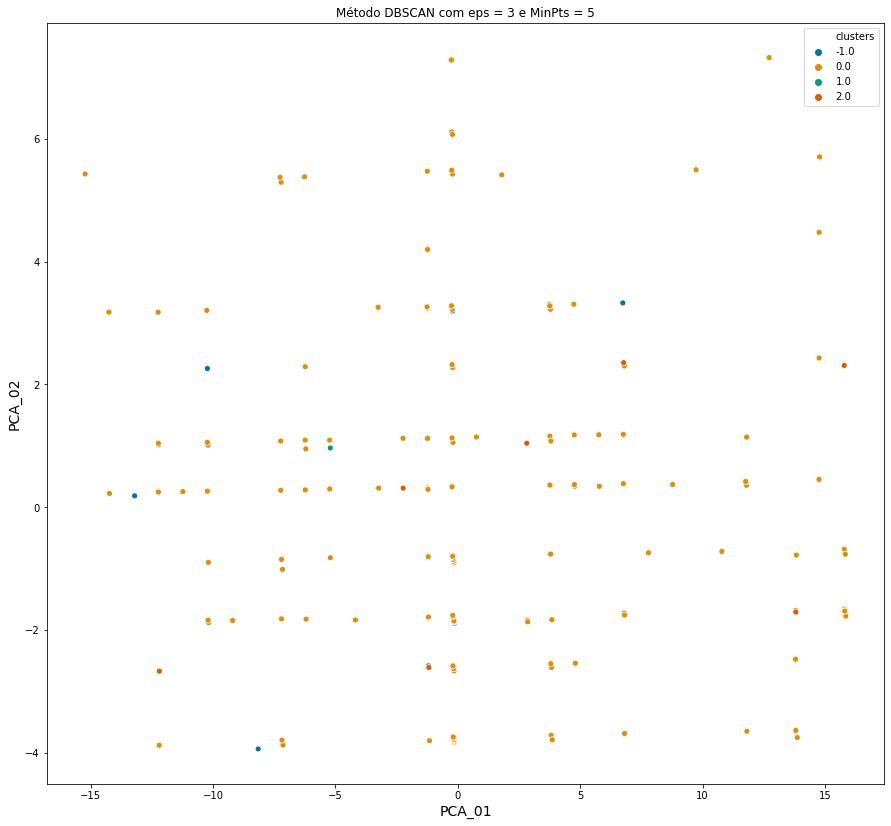

In [59]:
# Utilizando o PCA
red_df_dbs = PCA(n_components=2).fit_transform(df_dbs)
res_dbs = pd.DataFrame(red_df_dbs, columns=['PCA_01', 'PCA_02'])

# Visualizando os dados agrupados pelo método k-means
plt.figure(figsize=(15,14))
sns.scatterplot(x="PCA_01", y="PCA_02", hue=df_dbs['clusters'], palette=sns.color_palette("colorblind", n_colors=4), data=res_dbs)
plt.xlabel("PCA_01", fontsize=14)
plt.ylabel("PCA_02", fontsize=14)
plt.title('Método DBSCAN com eps = 3 e MinPts = 5')
plt.show()

Como podemos perceber o método *DBSCAN* não apresentou agrupamentos claros; também, pode-se notar que muitos pontos ficaram em apenas um grupo podendo ter ocasionado *overfitting* utilizando esse método.

##### **Conclusões sobre o Método *DBSCAN***

Utilizando o método *DBSCAN*, percebemos que:
- Não foi possível identificar agrupamentos claros;
- O método pode ter incorrido em *overfitting*.

### **Considerações finais**

Com a análise dos acidentes de trabalho, podemos concluir:
- Nos diferentes setores da empresa analisada, o que mais ocorre acidentes é o de Mineração;
- Acidentes de nível I (com menor severidade) são os mais comuns, no entanto é importante agir para que esses acidentes diminuam ou não ocorram antes que se transforme em um acidente de maior severidade;
- Nessa empresa, mais de 90% dos acidentes ocorreram com pessoas do gênero masculino;
- Empregados terceirizados apresentam um número levemente maior de acidentes em relação aos empregados diretos;
- Os acidentes de trabalho apresentam um certa sazonalidade, além disso a empresa teve um diminuição nos acidentes no ano de 2017 comparado com 2016;
- O conjunto de dados não apresentou nenhum tipo de agrupamento (*cluster*) claro utilizando 3 métodos diferentes.

### **Fonte dos dados**

[Industrial Safety and Health Analytics Database](https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database). Disponibilizado por: **IHM Stefanini**.